### Sobre o notebook

Esse notebook contém diversos desafios envolvendo os aprendizados de cada aula. É um notebook construído com o enunciado de cada desafio e com espaço para construir e executar suas soluções. Se for necessário adicionar mais células de código para solucionar o desafio, fique à vontade para acrescentar.

Vamos praticar o conteúdo que foi apresentado na aula a partir de algumas atividades, porém usando um conjunto de dados diferente com dados de pacientes a serem diagnosticados com diabetes ou não.

# Aula 1

### Desafio 1

Faça a leitura da base de dados de diabetes e realize a divisão dos dados em variáveis explicativas e variável alvo (x e y).

A variável alvo é a coluna que quer classificar, contendo a informação se o paciente possui ou não a diabetes. As variáveis explicativas são todas as colunas com exceção da diabetes. 

In [27]:
import pandas as pd
df = pd.read_csv('diabetes.csv')
df.head()

,glicemia,pressao_sanguinea,dobra_cutane_triceps,insulina,imc,diabetes
0,66,23,94,28.1,0.167,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,0.248,1
3,70,45,543,30.5,0.158,1
4,60,23,846,30.1,0.398,1


In [28]:
x = df.drop('diabetes', axis=1)
y = df['diabetes']

x.head()

,glicemia,pressao_sanguinea,dobra_cutane_triceps,insulina,imc
0,66,23,94,28.1,0.167
1,40,35,168,43.1,2.288
2,50,32,88,31.0,0.248
3,70,45,543,30.5,0.158
4,60,23,846,30.1,0.398


In [29]:
y

0      0
1      1
2      1
3      1
4      1
      ..
389    1
390    1
391    0
392    0
393    0
Name: diabetes, Length: 394, dtype: int64

### Desafio 2

Realize a divisão dos dados entre treino e teste.

Utilize 5% dos dados para teste e com o restante, deixe 25% para validação. No momento da separação, use o parâmetro stratify a partir da variável alvo para manter a proporção dos dados.

In [30]:
from sklearn.model_selection import train_test_split

x, x_test, y, y_test = train_test_split(x, y, test_size=.05, stratify=y, random_state=5)
print(f'Proporção testes: {x_test.shape[0]/x.shape[0]}')
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.25, stratify=y, random_state=5)
print(f'Proporção validação: {x_val.shape[0]/x.shape[0]}')

Proporção testes: 0.053475935828877004
Proporção validação: 0.25133689839572193


### Desafio 3

Crie 2 modelos utilizando os algoritmos [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) e [RandomForestClassifer](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) e avalie a acurácia de treino e teste, escolhendo valores para o parâmetro `max_depth` para os modelos não se especializarem demais no padrão dos dados de treino.  Utilize o valor 3 para o parâmetro `max_depth` do algoritmo `DecisionTreeClassifier` e valor 2 para o `max_depth` do algoritmo `RandomForestClassifier`.

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

tree = DecisionTreeClassifier(max_depth=3, random_state=5)
tree.fit(x_train, y_train)

rfc = RandomForestClassifier(max_depth=2, random_state=5)
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, random_state=5)

In [33]:
print('--- Decision Tree ---')
print(f'Acurácia treino: {tree.score(x_train, y_train)}')
print(f'Acurácia validação: {tree.score(x_val, y_val)}')
print('\n--- Random Forest ---')
print(f'Acurácia treino: {rfc.score(x_train, y_train)}')
print(f'Acurácia validação: {rfc.score(x_val, y_val)}')

--- Decision Tree ---
Acurácia treino: 0.7571428571428571
Acurácia validação: 0.776595744680851

--- Random Forest ---
Acurácia treino: 0.7285714285714285
Acurácia validação: 0.7021276595744681


### Desafio 4

Construa uma matriz de confusão para cada um dos modelos para avaliar o desempenho das previsões.

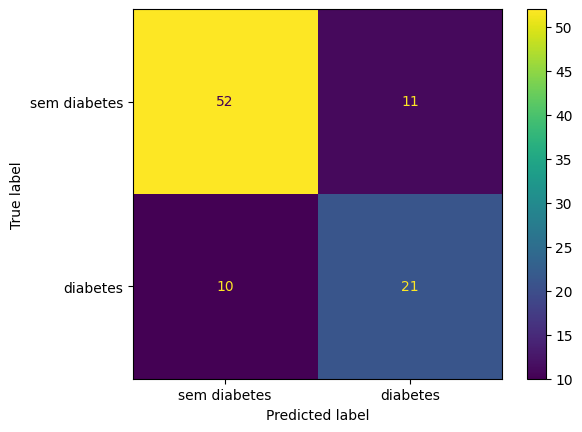

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_tree = tree.predict(x_val)
conf_mat = confusion_matrix(y_val, y_pred_tree)
display = ConfusionMatrixDisplay(conf_mat, display_labels=['sem diabetes', 'diabetes'])
display.plot();

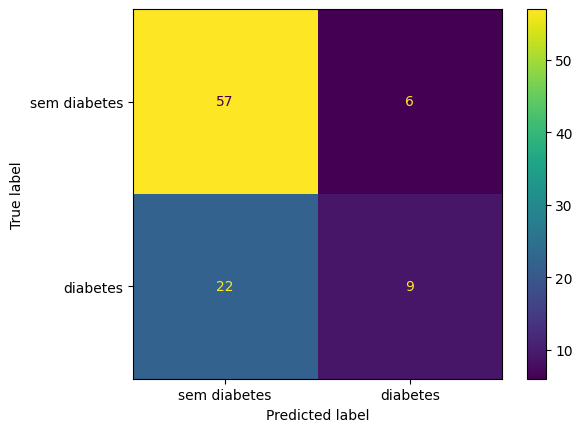

In [35]:
y_pred_rfc = rfc.predict(x_val)
conf_mat = confusion_matrix(y_val, y_pred_rfc)
display = ConfusionMatrixDisplay(conf_mat, display_labels=['sem diabetes', 'diabetes'])
display.plot();

# Aula 2

### Desafio 1

Extraia as métricas acurácia, recall, precisão e F1-Score dos modelos de classificação gerados no desafio da aula 1.

In [36]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print('--- Decision Tree ---')
print(f'Acurácia: {accuracy_score(y_val, y_pred_tree)}')
print(f'Recall: {recall_score(y_val, y_pred_tree)}')
print(f'Precisão: {precision_score(y_val, y_pred_tree)}')
print(f'F1-Score: {f1_score(y_val, y_pred_tree)}')

print('\n--- Random Forest ---')
print(f'Acurácia: {accuracy_score(y_val, y_pred_rfc)}')
print(f'Recall: {recall_score(y_val, y_pred_rfc)}')
print(f'Precisão: {precision_score(y_val, y_pred_rfc)}')
print(f'F1-Score: {f1_score(y_val, y_pred_rfc)}')

--- Decision Tree ---
Acurácia: 0.776595744680851
Recall: 0.6774193548387096
Precisão: 0.65625
F1-Score: 0.6666666666666667

--- Random Forest ---
Acurácia: 0.7021276595744681
Recall: 0.2903225806451613
Precisão: 0.6
F1-Score: 0.3913043478260869


### Desafio 2

Obtenha a curva ROC e a métrica AUC dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

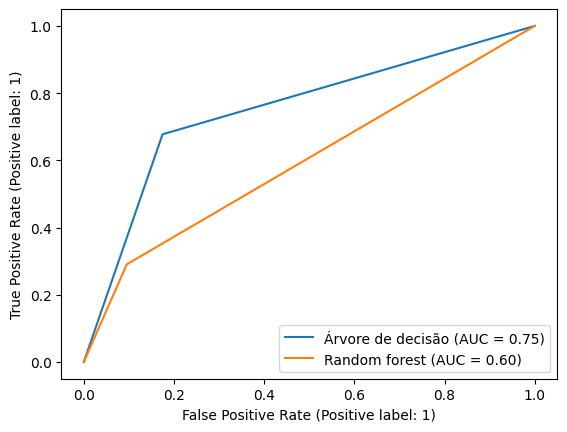

In [37]:
from sklearn.metrics import RocCurveDisplay

tree_disp = RocCurveDisplay.from_predictions(y_val, y_pred_tree, name='Árvore de decisão')
# telling rfc_disp to be plotted on the Axes of tree_disp 
rfc_disp = RocCurveDisplay.from_predictions(y_val, y_pred_rfc, ax=tree_disp.ax_, name='Random forest')

### Desafio 3

Obtenha a curva precisão x recall e a métrica AP dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

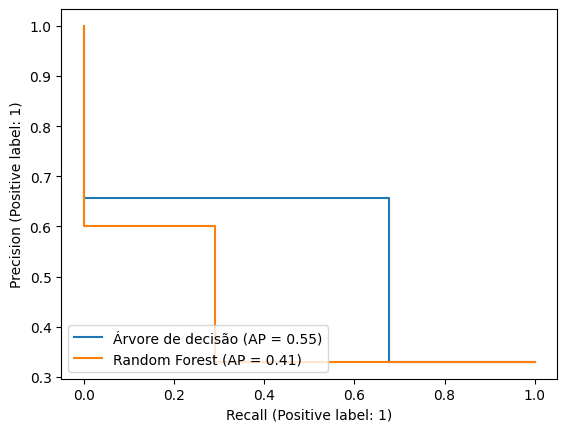

In [38]:
from sklearn.metrics import PrecisionRecallDisplay

tree_disp = PrecisionRecallDisplay.from_predictions(y_val, y_pred_tree, name='Árvore de decisão')
rfc_disp = PrecisionRecallDisplay.from_predictions(y_val, y_pred_rfc, name='Random Forest', ax=tree_disp.ax_)

### Desafio 4

Gere os relatórios de métricas dos modelos de classificação gerados no desafio da aula 1.

In [39]:
from sklearn.metrics import classification_report

print('--- Decision Tree ---')
print(classification_report(y_val, y_pred_tree))
print('\n--- Random Forest ---')
print(classification_report(y_val, y_pred_rfc))

--- Decision Tree ---
              precision    recall  f1-score   support

           0       0.84      0.83      0.83        63
           1       0.66      0.68      0.67        31

    accuracy                           0.78        94
   macro avg       0.75      0.75      0.75        94
weighted avg       0.78      0.78      0.78        94


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.72      0.90      0.80        63
           1       0.60      0.29      0.39        31

    accuracy                           0.70        94
   macro avg       0.66      0.60      0.60        94
weighted avg       0.68      0.70      0.67        94



# Aula 3

### Desafio 1

Crie uma função para calcular o intervalo de confiança dos resultados de uma validação cruzada com 2 desvios padrão. A função precisa ter um parâmetro para receber uma lista com os desempenhos da validação cruzada e outro para apresentar o nome do modelo utilizado na validação cruzada. Exemplo de retorno da função:

> Intervalo de confiança ("nome do modelo"): ["valor mínimo do intervalo", "valor máximo do intervalo"]



In [41]:
def confidence_interval(results, model):
    r_mean = results.mean()
    r_std = results.std()
    print(f'Intervalo de confiança ({model}): [{max(r_mean-2*r_std, 0)}, {min(r_mean+2*r_std, 1)}]')

### Desafio 2

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada com o método [`KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html), usando 10 partes e embaralhando os dados antes da separação. Use o método [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) que não retorna o tempo de execução, apenas as métricas.

In [42]:
from sklearn.model_selection import KFold, cross_val_score

tree = DecisionTreeClassifier(max_depth = 3, random_state=5)
rfc = RandomForestClassifier(max_depth = 2, random_state=5)

kf = KFold(n_splits=10, shuffle=True, random_state=5)

cv_results = cross_val_score(tree, x, y, cv=kf)
confidence_interval(cv_results, 'árvore de decisão')
cv_results = cross_val_score(rfc, x, y, cv=kf)
confidence_interval(cv_results, 'random forest')

Intervalo de confiança (árvore de decisão): [0.5292910838089362, 0.8675794709563556]
Intervalo de confiança (random forest): [0.6101104922855386, 0.790316250246467]


### Desafio 3

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada (`cross_val_score`) com o método [`StratifiedKFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold), usando 10 partes e embaralhando os dados antes da separação e avaliando a métrica F1-Score.

In [43]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)

cv_results = cross_val_score(tree, x, y, cv=skf, scoring='f1')
confidence_interval(cv_results, 'árvore de decisão')
cv_results = cross_val_score(rfc, x, y, cv=skf, scoring='f1')
confidence_interval(cv_results, 'random forest')

Intervalo de confiança (árvore de decisão): [0.26819817504630894, 0.7354166140441551]
Intervalo de confiança (random forest): [0.07765303252570596, 0.5770029255513047]


### Desafio 4

Avalie o desempenho dos modelos utilizando a validação cruzada (`cross_val_score`) com o método [`LeaveOneOut`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html).

O método LeaveOneOut vai gerar um modelo para cada uma das linhas da base de dados, portanto a lista de resultados terá taxa de acerto apenas de 0 ou 1 para cada modelo. Dessa forma, extraia apenas a média do resultado, sem utilizar o intervalo de confiança.


In [44]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
cv_results = cross_val_score(tree, x, y, cv=loo)
print(f'Média (árvore de decisão):{cv_results.mean()}')

# this one will take a little longer to run
cv_results = cross_val_score(rfc, x, y, cv=loo)
print(f'Média (random forest):{cv_results.mean()}')

Média (árvore de decisão):0.7085561497326203
Média (random forest):0.6818181818181818


# Aula 4

### Desafio 1

Verifique a proporção de dados da variável alvo do conjunto de dados de diabetes. Essa análise pode ser feita a partir da porcentagem de dados ou com a utilização de um gráfico de contagem para entender se há um desbalanceamento de dados.

0    0.670051
1    0.329949
Name: diabetes, dtype: float64

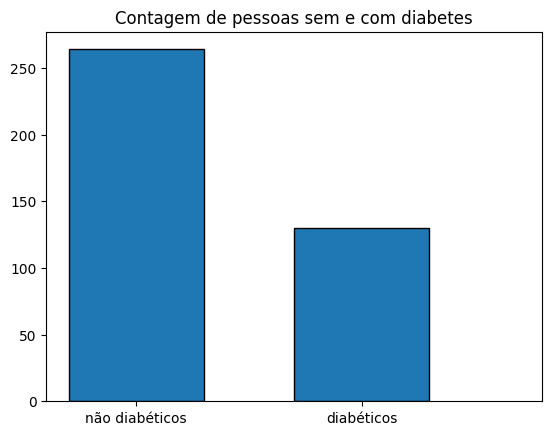

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# can't use y variable, as it only has training-validation data now
target = df['diabetes']
bins = np.histogram(target, bins=2)[1] # getting bin edges
bar_width = .3

plt.hist(target, bins=2, edgecolor='black', width=bar_width)
plt.title('Contagem de pessoas sem e com diabetes');
plt.xticks(bins[:-1] + bar_width / 2, ['não diabéticos', 'diabéticos']);

target.value_counts(normalize=True)

Temos 67% de entradas de pessoas sem diabetes e 33% de entradas de pessoas com diabetes. É uma proporção de 2:1, evidenciando uma base de dados desbalanceada

### Desafio 2

Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o oversampling com [`SMOTE`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html), obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

In [49]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import StratifiedKFold

# models
tree = DecisionTreeClassifier(max_depth = 3, random_state=5)
rfc = RandomForestClassifier(max_depth = 2, random_state=5)

# pipelines
pipe_tree = imbpipeline([('oversampling', SMOTE(random_state=5)), ('model', tree)])
pipe_rfc = imbpipeline([('oversampling', SMOTE(random_state=5)), ('model', rfc)])

skf = StratifiedKFold(shuffle=True, random_state=5)

cv_results = cross_val_score(pipe_tree, x, y, cv=skf, scoring='f1')
print(f'Média (árvore de decisão):{cv_results.mean()}')
cv_results = cross_val_score(pipe_rfc, x, y, cv=skf, scoring='f1')
print(f'Média (random forest):{cv_results.mean()}')

Média (árvore de decisão):0.5707111199425106
Média (random forest):0.6180420588568261


### Desafio 3

 Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o undersampling com [`Nearmiss`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) na sua versão 3, obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

In [58]:
from imblearn.under_sampling import NearMiss

# pipelines
pipe_tree = imbpipeline([('undersampling', NearMiss(version=3)), ('model', tree)])
pipe_rfc = imbpipeline([('undersample', NearMiss(version=3)), ('model', rfc)])

skf = StratifiedKFold(shuffle=True, random_state=5)

cv_results = cross_val_score(pipe_tree, x, y, cv=skf, scoring='f1')
print(f'Média (árvore de decisão):{cv_results.mean()}')
cv_results = cross_val_score(pipe_rfc, x, y, cv=skf, scoring='f1')
print(f'Média (random forest):{cv_results.mean()}')

Média (árvore de decisão):0.4614724073740467
Média (random forest):0.5915721040189126


### Desafio 4

Escolha o modelo que obteve o melhor desempenho ao comparar as estratégias de oversampling e undersampling e realize o teste do modelo nos dados de teste que foram separados no início dos desafios.

O modelo de Random Forest, aplicando SMOTE, obteve um F1 score melhor.

              precision    recall  f1-score   support

           0       0.82      0.69      0.75        13
           1       0.56      0.71      0.63         7

    accuracy                           0.70        20
   macro avg       0.69      0.70      0.69        20
weighted avg       0.73      0.70      0.71        20



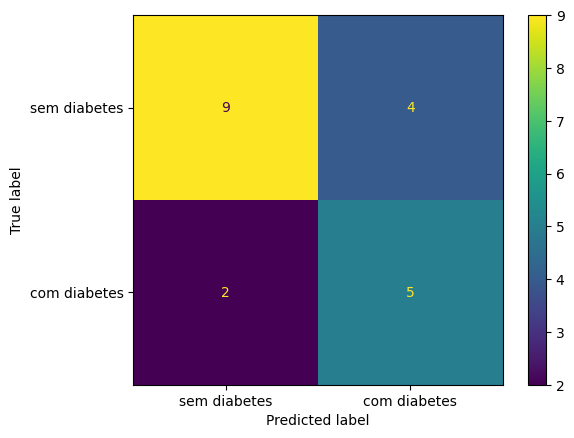

In [60]:
x_bal, y_bal = SMOTE().fit_resample(x, y)

rfc = RandomForestClassifier(max_depth = 2, random_state=5)
rfc.fit(x_bal, y_bal)

y_pred = rfc.predict(x_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['sem diabetes', 'com diabetes'])